<a href="https://colab.research.google.com/github/albordunos/AI_literacy/blob/main/LDA_Excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic modeling
- это подход к анализу текстов, который позволяет автоматически выявлять скрытые темы в коллекции документов. Этот подход помогает исследователям обнаруживать основные темы, которые присутствуют в текстах, и группировать документы по этим темам.

# Основные шаги для проведения topic modeling:

## 1. Подготовка данных:
Исследователи должны собрать и подготовить текстовую коллекцию для анализа. Это включает в себя очистку текста от шума, удаление стоп-слов и приведение текста к стандартному формату.



In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Phrases  # Импортируем класс Phrases

# Определение своих стоп-слов
custom_stop_words = ['ai', 'intelligence', 'artificial', 'literacy', 'students', 'learning']

# Очистка данных от стоп слов и токенизация
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english') + custom_stop_words)

def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
        return filtered_tokens
    else:
        return []

# Загрузка данных из Excel файла
file_path = '/content/AILIT_SHORT.xlsx'  #загрузить файл и прописать путь к нему
data = pd.read_excel(file_path)

# Применение функции preprocess_text к столбцу 'Abstract'
data['cleaned_abstract'] = data['Abstract'].apply(preprocess_text) #переименовать название столбца "Abstracts"

print(data.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   ID                                          Author1  \
0   1   Du H.; Sun Y.; Jiang H.; Islam A.Y.M.A.; Gu X.   
1   2  Knoth N.; Tolzin A.; Janson A.; Leimeister J.M.   
2   3                                        Walter Y.   
3   4                         Kajiwara Y.; Kawabata K.   
4   5                Young J.D.; Dawood L.; Lewis S.E.   

                                          AuthorFull  \
0  Du, Hua (57857556600); Sun, Yanchao (590125474...   
1  Knoth, Nils (58993453900); Tolzin, Antonia (58...   
2                      Walter, Yoshija (57217583001)   
3  Kajiwara, Yusuke (54681995100); Kawabata, Kouh...   
4  Young, Jessica D. (57405252300); Dawood, Lisa ...   

                                                 ID2  \
0  57857556600; 59012547400; 57222725051; 5518398...   
1  58993453900; 58177381500; 56102705500; 5774161...   
2                                        57217583001   
3                           54681995100; 59162836000   
4               57405252300; 59146

# Новый раздел

## 2. Выбор модели:
Для проведения topic modeling исследователи должны выбрать подходящую модель, такую как Latent Dirichlet Allocation (LDA) или Non-Negative Matrix Factorization (NMF). Каждая модель имеет свои особенности, и выбор модели зависит от конкретной задачи и структуры данных. Про сравнение моделей можно прочитать [тут](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9120935/).

## 3. Обучение модели:
 После выбора модели исследователи должны обучить ее на текстовых данных. Обучение модели topic modeling включает в себя настройку параметров модели и определение числа тем, которые необходимо выделить.


data['cleaned_abstract'] - это список текстовых данных, из которых будут извлекаться биграммы.

min_count=5 означает, что биграммы, которые встречаются менее 5 раз во всем корпусе текстов, будут проигнорированы.

threshold=10 - это порог ассоциации между словами в биграмме. Чем выше этот параметр, тем более "связанными" должны быть слова, чтобы образовывать биграмму.

start = 2:
Это начальное количество тем для проверки. Модель будет проверять от 2 тем и выше. Выбор 2 как начального значения позволяет избежать моделей с одной темой, которые обычно не дают полезной информации.

limit = 10:
Это максимальное количество тем, которое вы хотите проверить.
В данном случае проверка будет проводиться до 10 тем.
Это значение можно изменить в зависимости от объема данных и целей анализа. Например, если у вас много данных, вы можете увеличить это значение, чтобы исследовать большее количество тем.

step = 1:
Это шаг, с которым будет увеличиваться количество тем на каждой итерации.
В данном случае шаг равен 1, что означает, что количество тем будет увеличиваться на 1 на каждой итерации (2, 3, 4, ..., 10).

In [ ]:
# Создание биграмм
bigram_model = Phrases(data['cleaned_abstract'], min_count=5, threshold=10)
data['bigrams'] = data['cleaned_abstract'].apply(lambda tokens: bigram_model[tokens])

   Num Topics  Coherence  Perplexity  Log Likelihood
0           2   0.259545    8.956740    -7504.222842
1           3   0.424101    9.620624    -8060.445172
2           4   0.521660   10.167406    -8518.555485
3           5   0.508147   10.641270    -8915.572369


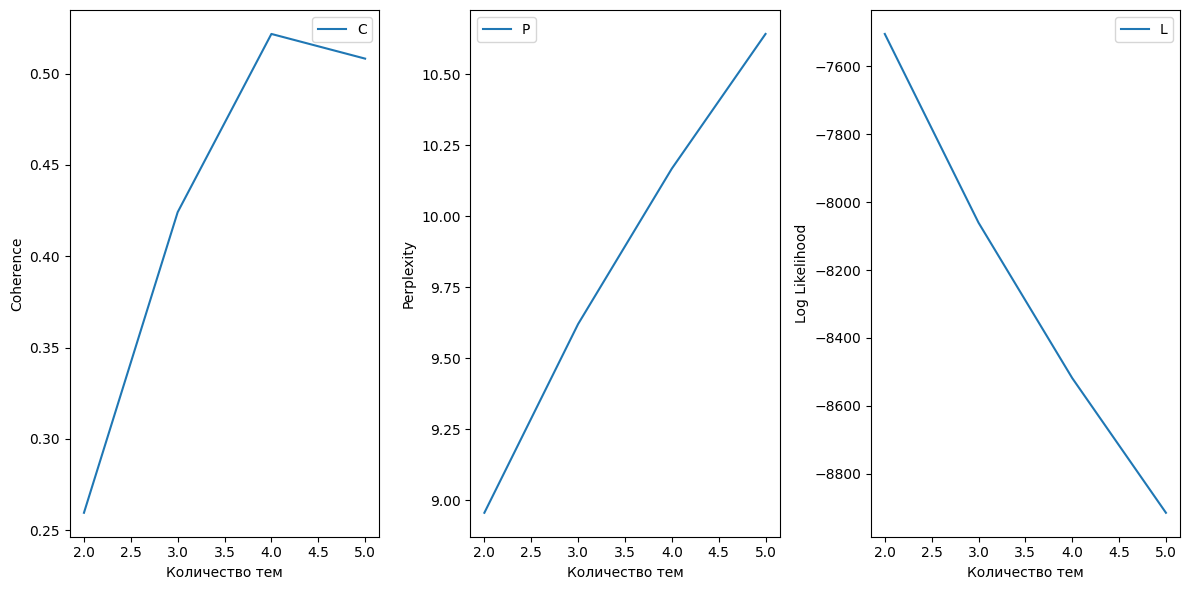

Оптимальное количество тем по когерентности: 4
Оптимальное количество тем по perplexity: 5
Оптимальное количество тем по log likelihood: 2


In [ ]:
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd
import matplotlib.pyplot as plt

# Создание словаря и корпуса
dictionary = corpora.Dictionary(data['bigrams'])
corpus = [dictionary.doc2bow(text) for text in data['bigrams']]

# Вычисление TF-IDF
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Функция для вычисления когерентности, perplexity и log likelihood модели LDA
def compute_metrics(dictionary, corpus, texts, limit=8, start=2, step=1):
    coherence_values = []
    perplexity_values = []
    log_likelihood_values = []
    model_list = []
    num_topics_range = []

    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=150)
        model_list.append(model)

        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

        perplexity_values.append(-model.log_perplexity(corpus))
        log_likelihood_values.append(model.bound(corpus))

        num_topics_range.append(num_topics)

    return model_list, coherence_values, perplexity_values, log_likelihood_values, num_topics_range

# Параметры для подбора количества тем
start = 2
limit = 6  # максимальное количество тем, которое вы хотите проверить
step = 1

if limit < start:
    print("Ошибка: limit должно быть больше или равно start")
    exit()
if step <= 0:
    print("Ошибка: step должно быть больше 0")
    exit()

# Вычисление метрик для различных значений num_topics
model_list, coherence_values, perplexity_values, log_likelihood_values, num_topics_range = compute_metrics(dictionary, corpus_tfidf, data['bigrams'], limit, start, step)

# Создание таблицы с результатами
metrics_df = pd.DataFrame({
    'Num Topics': num_topics_range,
    'Coherence': coherence_values,
    'Perplexity': perplexity_values,
    'Log Likelihood': log_likelihood_values
})
print(metrics_df)

# Отображение результатов
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(num_topics_range, coherence_values)
plt.xlabel("Количество тем")
plt.ylabel("Coherence")
plt.legend(("Coherence"), loc='best')

plt.subplot(1, 3, 2)
plt.plot(num_topics_range, perplexity_values)
plt.xlabel("Количество тем")
plt.ylabel("Perplexity")
plt.legend(("Perplexity"), loc='best')

plt.subplot(1, 3, 3)
plt.plot(num_topics_range, log_likelihood_values)
plt.xlabel("Количество тем")
plt.ylabel("Log Likelihood")
plt.legend(("Log Likelihood"), loc='best')

plt.tight_layout()
plt.show()

# Вывод количества тем с максимальной когерентностью
optimal_num_topics = num_topics_range[coherence_values.index(max(coherence_values))]
print(f'Оптимальное количество тем по когерентности: {optimal_num_topics}')

# Вывод количества тем с максимальной perplexity
optimal_num_topics_perplexity = num_topics_range[perplexity_values.index(max(perplexity_values))]
print(f'Оптимальное количество тем по perplexity: {optimal_num_topics_perplexity}')

# Вывод количества тем с максимальной log likelihood
optimal_num_topics_log_likelihood = num_topics_range[log_likelihood_values.index(max(log_likelihood_values))]
print(f'Оптимальное количество тем по log likelihood: {optimal_num_topics_log_likelihood}')

In [ ]:
from gensim import models


# Параметры для подбора количества тем
num_topics = int(input("Введите количество тем: "))

# Создание модели LDA с заданным количеством тем
lda_model = models.LdaModel(corpus_tfidf, num_topics=num_topics, id2word=dictionary, passes=150)


# Функция для получения доминирующей темы для документа
def get_dominant_topic(lda_model, doc_topics):
    return max(doc_topics, key=lambda item: item[1])

# Получение тем для всех документов
doc_topics = lda_model.get_document_topics(corpus_tfidf)

# Вывод результатов
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {}'.format(idx))
    print('Words: {}'.format(topic))

    # Получение документов, относящихся к теме
    doc_topics = lda_model.get_document_topics(corpus_tfidf)
    docs = [doc_id for doc_id, topic_values in enumerate(doc_topics) if max(topic_values, key=lambda x: x[1])[0] == idx]

    # Вывод номеров строк для темы
    print('Документы (строки):', docs)
    print()

Введите количество тем: 4
Topic: 0
Words: 0.001*"writing" + 0.001*"sac" + 0.001*"generative" + 0.001*"factors" + 0.001*"instructors" + 0.001*"intention_learn" + 0.001*"computational_thinking" + 0.001*"activities" + 0.001*"maker" + 0.001*"respondents"
Документы (строки): [4, 5, 8, 10, 11, 14, 17, 21, 24, 25, 26, 36, 51, 53, 54, 59, 69, 71, 72, 78, 85, 89, 92, 93, 94, 102, 104, 106]

Topic: 1
Words: 0.001*"genai" + 0.001*"children" + 0.001*"teachers" + 0.001*"course" + 0.001*"digital" + 0.001*"ivas" + 0.001*"skills" + 0.001*"program" + 0.001*"technologies" + 0.001*"needs"
Документы (строки): [19, 22, 23, 29, 31, 32, 38, 39, 40, 43, 46, 48, 49, 57, 60, 67, 73, 74, 77, 81, 82, 87, 88, 98]

Topic: 2
Words: 0.001*"medical" + 0.001*"chatgpt" + 0.001*"prompt_engineering" + 0.001*"children" + 0.001*"kindergarten" + 0.001*"public" + 0.001*"pedagogical" + 0.001*"dsw" + 0.001*"three" + 0.001*"kindergarten_children"
Документы (строки): [1, 2, 3, 7, 15, 20, 27, 33, 35, 41, 45, 52, 58, 64, 65, 66, 70

## 4. Интерпретация результатов:

После обучения модели исследователи могут проанализировать результаты topic modeling. Это включает в себя изучение выделенных тем, определение ключевых слов и документов, относящихся к каждой теме, а также оценку качества модели.

In [ ]:
!pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.3 MB/s eta 0:00:00


In [ ]:
import gensim
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models

# Создание визуализации
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

# Создание визуализации для каждой темы отдельно
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, mds='tsne')
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


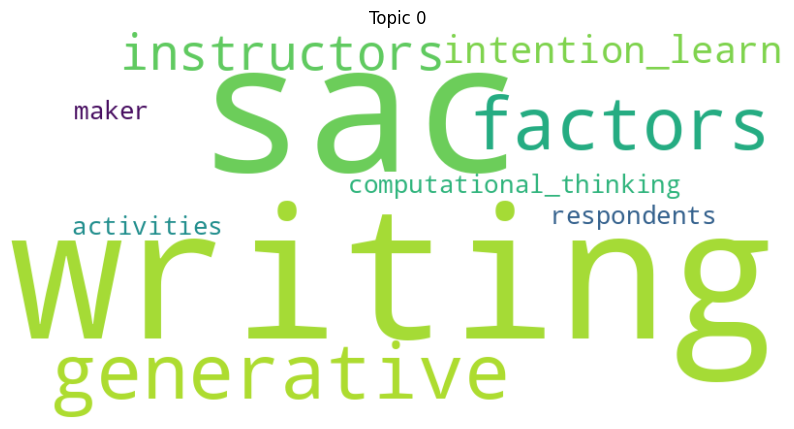

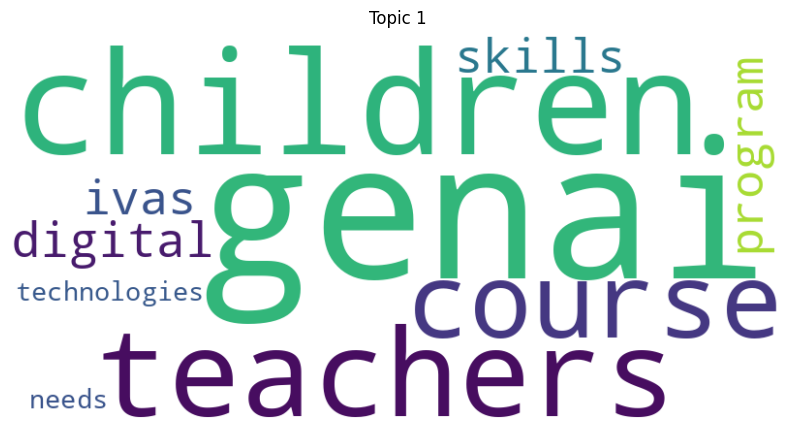

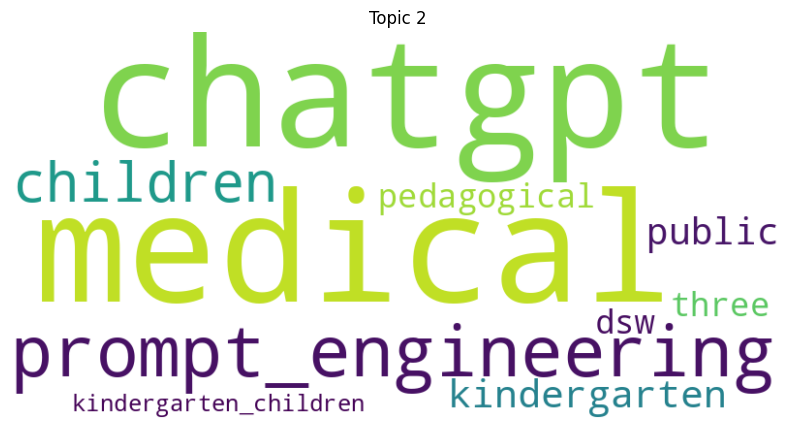

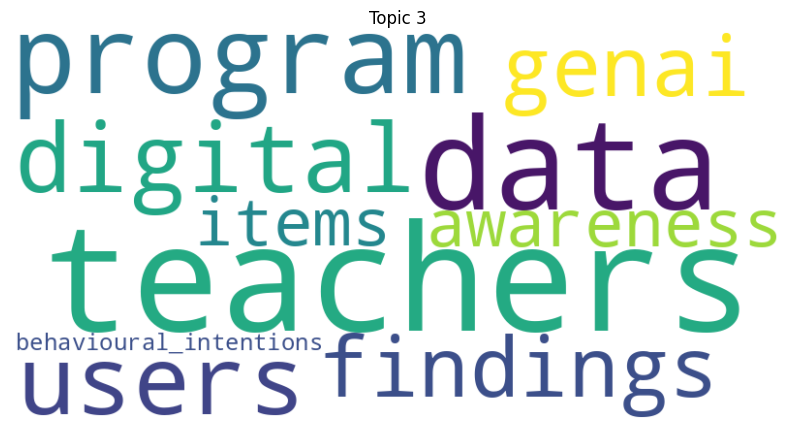

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Получение наиболее вероятных слов для каждой темы
topics_words = lda_model.show_topics(formatted=False)

# Создание облака слов для каждой темы
for topic_id, topic in topics_words:
    word_freq = {word: freq for word, freq in topic}

    # Генерация облака слов
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Визуализация облака слов
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_id}')
    plt.show()

#5. Оценка эффективности модели

Для оценки эффективности модели LDA можно использовать несколько метрик, включая perplexity (перплексия) и coherence score (коэффициент когерентности). Вот как вы можете вычислить эти параметры:

* Perplexity (Перплексия): Perplexity - это метрика, которая оценивает, насколько хорошо модель предсказывает тестовый набор данных. Чем ниже значение perplexity, тем лучше модель.

* Coherence Score (Коэффициент когерентности): Коэффициент когерентности предоставляет оценку того, насколько хорошо слова в одной теме согласуются друг с другом. Более высокий коэффициент когерентности указывает на более осмысленные темы.

* средний индекс Jaccard (Average Jaccard Index)
* Topic Diversity: Показывает, насколько разнообразны темы.
* Topic Stability: Показывает, насколько стабильны темы при изменении данных.
* Human Evaluation: Важно проводить оценку тем человеком, чтобы убедиться в их интерпретируемости и соответствии вашим ожиданиям.
* Средняя точность тем (Average Topic Precision): Средняя точность тем измеряет степень четкости (точности) каждой темы в модели LDA.

In [ ]:
from gensim.matutils import jaccard

# Вычисление среднего индекса Jaccard между всеми парами тем
jaccard_scores = []
num_topics = lda_model.num_topics
for i in range(num_topics):
    for j in range(i+1, num_topics):
        jaccard_score = jaccard(lda_model.get_topic_terms(i), lda_model.get_topic_terms(j))
        jaccard_scores.append(jaccard_score)

average_jaccard_index = sum(jaccard_scores) / len(jaccard_scores)
print('Average Jaccard Index:', average_jaccard_index)

Average Jaccard Index: 0.7670349972866162


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
perplexity = lda_model.log_perplexity(corpus)  # Чем ниже, тем лучше
print('Perplexity:', perplexity)

Perplexity: -7.229835094621793


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim
from gensim.models import CoherenceModel
# Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Coherence Score
# Используем c_v coherence
coherence_model_lda = CoherenceModel(model=lda_model, texts=data['bigrams'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)  # Чем выше, тем лучше

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.229835093657449

Coherence Score:  0.28519350008412886
